In [29]:
from numpy.random import seed 
seed(1) 
from tensorflow import set_random_seed 
set_random_seed(2)
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np



#from numpy.random import seed
#seed(1)


x_train = np.genfromtxt('E:\deep learning\hyper155c1\data6040 pca-add/x_train.csv',delimiter=",")
y_train = np.genfromtxt('E:\deep learning\hyper155c1\data6040 pca-add/y_train.csv',delimiter=",")

x_test = np.genfromtxt('E:\deep learning\hyper155c1\data6040 pca-add/x_test.csv',delimiter=",")
y_test = np.genfromtxt('E:\deep learning\hyper155c1\data6040 pca-add/y_test.csv',delimiter=",")

In [30]:
batch_size = 16 # Number of Images to send into the network for each pass 
num_classes = 3 # Total number of classes 
epochs = 7 # Total number of times the dataset has to be sent through the network
print(y_train)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [31]:
print(x_train)

[[  9.37815253  -0.24943754  -7.3383299  ...,  -0.11936099  -0.4741766
    0.03899424]
 [  1.12205785  -0.77647955  -3.39432006 ...,  -0.12118604   0.41831302
   -0.39720682]
 [ -4.10980835   7.1403527   -2.4022703  ...,  -0.0699018   -0.16162688
   -0.02932583]
 ..., 
 [  9.95619185  12.9309428   11.19465961 ...,   0.53512483  -0.35088907
   -0.26305556]
 [  8.26711508   6.66716042   9.44290216 ...,   0.28525675   0.02208326
    0.28181373]
 [  5.87644443   2.25542821   9.15078605 ...,   0.85203793  -0.21414645
    0.1388367 ]]


In [32]:
print(x_train.shape, y_train.shape)

(300, 36) (300,)


In [33]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

300 train samples
200 test samples


In [34]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [35]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 1

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 36

In [36]:
# Resizing the dataset into (Samples, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 36)
x_test = x_test.reshape(x_test.shape[0], img_size, img_size, 36)
input_shape = (img_size, img_size, 36)

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
import keras.backend as K
from keras.optimizers import SGD, Adam
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
dflist=[]
learning_rates=[0.01, 0.05,0.1,0.5]
for lr in learning_rates:
    K.clear_session()
    model=Sequential()
    model.add(Conv2D(5, (1,1), input_shape=input_shape))
    model.add(Conv2D(5, (1,1)))
    #model.add(MaxPool2D(pool_size=(1,1)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(5, activation='relu'))  #fully connected
    model.add(Dense(5, activation='relu'))  #fully connected
    model.add(Dense(3,activation='softmax'))  #output layer
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=16, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch))

In [39]:
historydf= pd.concat(dflist, axis=1)

In [40]:
historydf
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 1, 5)           185       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 5)           30        
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1, 5)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
Total para

In [41]:
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([learning_rates, metrics_reported], names=['Learning Rates','metrics'])

historydf.columns=idx

In [42]:
historydf

Learning Rates      0.01                0.05                0.10            \
metrics              acc      loss       acc      loss       acc      loss   
0               0.516667  1.024865  0.510000  1.033091  0.560000  1.058383   
1               0.613333  0.898649  0.623333  0.803768  0.660000  0.804472   
2               0.670000  0.785927  0.686667  0.652532  0.736667  0.625163   
3               0.713333  0.718967  0.740000  0.618525  0.770000  0.556191   
4               0.746667  0.637073  0.743333  0.575623  0.780000  0.518698   
5               0.766667  0.578840  0.756667  0.540572  0.780000  0.862148   
6               0.786667  0.513342  0.733333  0.575285  0.786667  0.819997   
7               0.793333  0.475680  0.766667  0.438059  0.773333  0.607479   
8               0.793333  0.448272  0.736667  0.424692  0.753333  0.599566   
9               0.793333  0.434542  0.770000  0.523750  0.770000  0.569147   

Learning Rates      0.50            
metrics              acc      loss  
0               0.500000  1.051671  
1               0.526667  1.062533  
2               0.526667  1.029137  
3               0.526667  1.035469  
4               0.526667  1.026945  
5               0.456667  1.048410  
6               0.526667  1.032116  
7               0.526667  1.022848  
8               0.526667  1.046947  
9               0.526667  1.077601

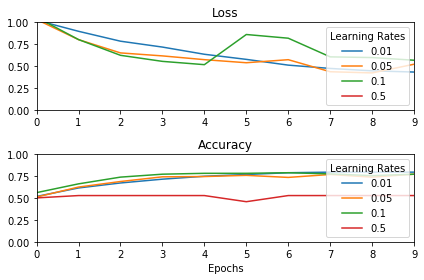

In [43]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metrics').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metrics').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()

# Batch size


In [44]:
dflist=[]
batch_sizes=[16,32,64,128]
for batch_size in batch_sizes:
    K.clear_session()
    
    model=Sequential()
    model.add(Conv2D(5, (1,1), input_shape=input_shape))
    model.add(Conv2D(5, (1,1)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(5, activation='relu'))  #fully connected
    model.add(Dense(5, activation='relu'))  #fully connected
    model.add(Dense(3,activation='softmax'))  #output layer
    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01),
             metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=batch_size, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch)) 

In [45]:
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([batch_sizes, metrics_reported], names=['batch_size','metrics'])

historydf.columns=idx

In [46]:
historydf

batch_size       16                  32                  64             \
metrics          acc      loss       acc      loss       acc      loss   
0           0.516667  1.024865  0.510000  1.033091  0.560000  1.058383   
1           0.613333  0.898649  0.623333  0.803768  0.660000  0.804472   
2           0.670000  0.785927  0.686667  0.652532  0.736667  0.625163   
3           0.713333  0.718967  0.740000  0.618525  0.770000  0.556191   
4           0.746667  0.637073  0.743333  0.575623  0.780000  0.518698   
5           0.766667  0.578840  0.756667  0.540572  0.780000  0.862148   
6           0.786667  0.513342  0.733333  0.575285  0.786667  0.819997   
7           0.793333  0.475680  0.766667  0.438059  0.773333  0.607479   
8           0.793333  0.448272  0.736667  0.424692  0.753333  0.599566   
9           0.793333  0.434542  0.770000  0.523750  0.770000  0.569147   

batch_size       128            
metrics          acc      loss  
0           0.500000  1.051671  
1           0.526667  1.062533  
2           0.526667  1.029137  
3           0.526667  1.035469  
4           0.526667  1.026945  
5           0.456667  1.048410  
6           0.526667  1.032116  
7           0.526667  1.022848  
8           0.526667  1.046947  
9           0.526667  1.077601

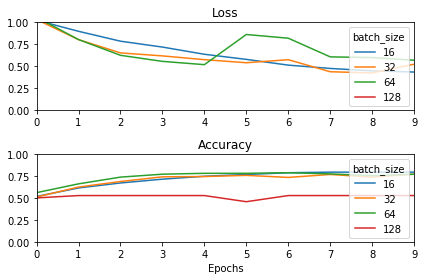

In [47]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metrics').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metrics').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()

# Optimizer


In [48]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [49]:
dflist=[]
optimizers=['SGD(lr=0.01)',
           'SGD(lr=0.01, momentum=0.3)',
           'SGD(lr=0.01, momentum=0.3, nesterov=True)',
           'Adam(lr=0.01)',
           'Adagrad(lr=0.01)',
           'RMSprop(lr=0.01)']
for opt_name in optimizers:
    K.clear_session()
    model=Sequential()
    model.add(Conv2D(25, (1,1), input_shape=input_shape))
    model.add(Conv2D(25, (1,1)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(25, activation='relu'))  #fully connected
    model.add(Dense(3,activation='softmax'))  #output layer
    model.compile(loss='categorical_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=16, epochs=10, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch))        

In [50]:
historydf=pd.concat(dflist,axis=1)
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([optimizers, metrics_reported], names=['optimizers','metric'])

historydf.columns=idx

In [51]:
historydf

optimizers SGD(lr=0.01)           SGD(lr=0.01, momentum=0.3)            \
metric              acc      loss                        acc      loss   
0              0.483333  1.020469                   0.516667  1.078358   
1              0.666667  0.834551                   0.653333  0.834100   
2              0.703333  0.746925                   0.706667  0.747971   
3              0.746667  0.689469                   0.736667  0.696199   
4              0.736667  0.638816                   0.750000  0.654676   
5              0.743333  0.612380                   0.766667  0.621203   
6              0.746667  0.581606                   0.773333  0.586122   
7              0.746667  0.561336                   0.790000  0.563068   
8              0.773333  0.536739                   0.790000  0.541308   
9              0.766667  0.518673                   0.800000  0.515602   

optimizers SGD(lr=0.01, momentum=0.3, nesterov=True)           Adam(lr=0.01)  \
metric                                           acc      loss           acc   
0                                           0.416667  1.044607      0.613333   
1                                           0.663333  0.847028      0.780000   
2                                           0.710000  0.744000      0.913333   
3                                           0.723333  0.671731      0.966667   
4                                           0.720000  0.630957      0.973333   
5                                           0.716667  0.599686      0.973333   
6                                           0.740000  0.572829      0.980000   
7                                           0.746667  0.546946      0.983333   
8                                           0.766667  0.521401      0.980000   
9                                           0.786667  0.499444      0.986667   

optimizers           Adagrad(lr=0.01)           RMSprop(lr=0.01)            
metric          loss              acc      loss              acc      loss  
0           0.873389         0.573333  0.952792         0.696667  0.726508  
1           0.472103         0.750000  0.593783         0.826667  0.483649  
2           0.231269         0.813333  0.494359         0.876667  0.341357  
3           0.130407         0.843333  0.425537         0.940000  0.174422  
4           0.085155         0.856667  0.379633         0.976667  0.102010  
5           0.110589         0.900000  0.321736         0.936667  0.179364  
6           0.061634         0.906667  0.288230         0.986667  0.039670  
7           0.031213         0.926667  0.261056         0.966667  0.162578  
8           0.021671         0.940000  0.237218         0.983333  0.039577  
9           0.021281         0.940000  0.213771         0.990000  0.038479

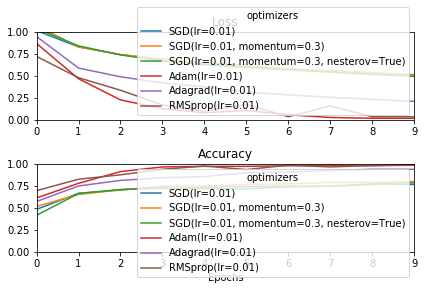

In [52]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metric').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()

# feed forward deep NN

In [53]:
# feed forward deep neural network


from keras.optimizers import SGD, Adam, Adagrad, RMSprop

dflist=[]
optimizers=['SGD(lr=0.01)',
           'SGD(lr=0.01, momentum=0.3)',
           'SGD(lr=0.01, momentum=0.3, nesterov=True)',
           'Adam(lr=0.01)',
           'Adagrad(lr=0.01)',
           'RMSprop(lr=0.01)']
for opt_name in optimizers:
    K.clear_session()
    model=Sequential()
 
    model.add(Dense(25, activation='relu', input_shape=input_shape)) # Input Dense layer
    model.add(Dense(25, activation='relu')) # Input Dense layer
    model.add(Dense(25, activation='relu')) # Input Dense layer
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax')) # Output layer with Softmax activation function
   
    model.compile(loss='categorical_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h=model.fit(x_train,y_train, batch_size=16, epochs=10, verbose=0)
    dflist.append(pd.DataFrame(h.history,index=h.epoch))



In [54]:
historydf=pd.concat(dflist,axis=1)
metrics_reported=dflist[0].columns
idx=pd.MultiIndex.from_product([optimizers, metrics_reported], names=['optimizers','metric'])

historydf.columns=idx



In [55]:
historydf


optimizers SGD(lr=0.01)           SGD(lr=0.01, momentum=0.3)            \
metric              acc      loss                        acc      loss   
0              0.426667  1.118278                   0.483333  1.002906   
1              0.573333  0.929526                   0.640000  0.796822   
2              0.633333  0.848051                   0.683333  0.720924   
3              0.636667  0.798393                   0.696667  0.665771   
4              0.650000  0.757365                   0.760000  0.618228   
5              0.660000  0.728387                   0.763333  0.585422   
6              0.666667  0.700967                   0.793333  0.550699   
7              0.673333  0.679354                   0.800000  0.521463   
8              0.696667  0.660302                   0.816667  0.494255   
9              0.696667  0.642590                   0.813333  0.473551   

optimizers SGD(lr=0.01, momentum=0.3, nesterov=True)           Adam(lr=0.01)  \
metric                                           acc      loss           acc   
0                                           0.513333  1.063637      0.646667   
1                                           0.693333  0.812166      0.800000   
2                                           0.716667  0.742284      0.873333   
3                                           0.746667  0.693394      0.923333   
4                                           0.756667  0.644714      0.980000   
5                                           0.763333  0.604587      0.990000   
6                                           0.780000  0.572902      0.986667   
7                                           0.796667  0.543002      0.990000   
8                                           0.780000  0.515079      0.996667   
9                                           0.813333  0.483468      0.993333   

optimizers           Adagrad(lr=0.01)           RMSprop(lr=0.01)            
metric          loss              acc      loss              acc      loss  
0           0.835190         0.633333  0.884493         0.676667  0.709625  
1           0.508390         0.756667  0.629588         0.866667  0.367526  
2           0.313295         0.786667  0.542425         0.936667  0.191347  
3           0.170268         0.830000  0.470398         0.973333  0.098668  
4           0.067570         0.860000  0.419188         0.956667  0.116007  
5           0.033871         0.876667  0.376118         0.976667  0.052024  
6           0.040617         0.883333  0.341702         0.986667  0.034920  
7           0.035645         0.886667  0.318369         0.983333  0.048866  
8           0.015281         0.896667  0.290387         0.983333  0.047060  
9           0.016970         0.903333  0.269471         0.983333  0.023969

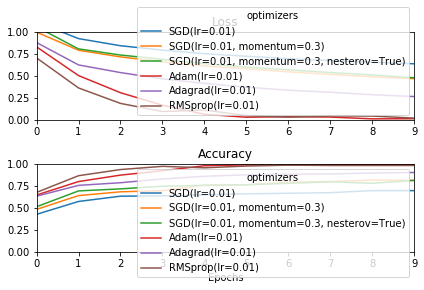

In [56]:
ax=plt.subplot(211)
historydf.xs('loss', axis=1,level='metric').plot(ylim =(0,1), ax=ax)
plt.title("Loss")

ax=plt.subplot(212)
historydf.xs('acc', axis=1,level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")

plt.xlabel("Epochs")

plt.tight_layout()